In [1]:
from google.colab import files 
files.upload()

Saving monthly_milk_production.csv to monthly_milk_production.csv


{'monthly_milk_production.csv': b'"Date","Production"\n"1962-01",589\n"1962-02",561\n"1962-03",640\n"1962-04",656\n"1962-05",727\n"1962-06",697\n"1962-07",640\n"1962-08",599\n"1962-09",568\n"1962-10",577\n"1962-11",553\n"1962-12",582\n"1963-01",600\n"1963-02",566\n"1963-03",653\n"1963-04",673\n"1963-05",742\n"1963-06",716\n"1963-07",660\n"1963-08",617\n"1963-09",583\n"1963-10",587\n"1963-11",565\n"1963-12",598\n"1964-01",628\n"1964-02",618\n"1964-03",688\n"1964-04",705\n"1964-05",770\n"1964-06",736\n"1964-07",678\n"1964-08",639\n"1964-09",604\n"1964-10",611\n"1964-11",594\n"1964-12",634\n"1965-01",658\n"1965-02",622\n"1965-03",709\n"1965-04",722\n"1965-05",782\n"1965-06",756\n"1965-07",702\n"1965-08",653\n"1965-09",615\n"1965-10",621\n"1965-11",602\n"1965-12",635\n"1966-01",677\n"1966-02",635\n"1966-03",736\n"1966-04",755\n"1966-05",811\n"1966-06",798\n"1966-07",735\n"1966-08",697\n"1966-09",661\n"1966-10",667\n"1966-11",645\n"1966-12",688\n"1967-01",713\n"1967-02",667\n"1967-03",762\n

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('monthly_milk_production.csv',index_col= 'Date',parse_dates= True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


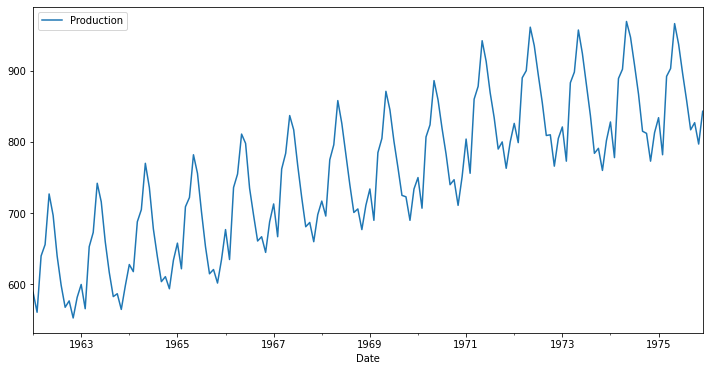

In [4]:
df.plot(figsize=(12,6))

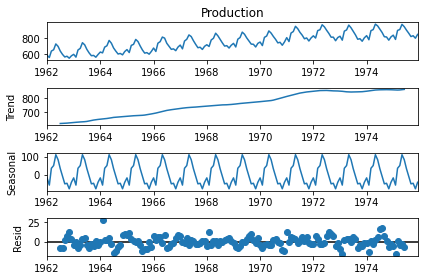

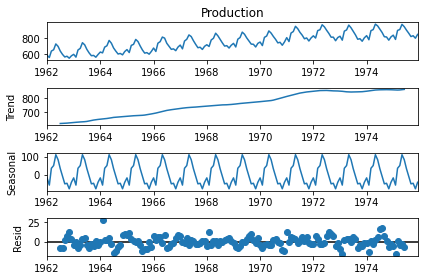

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df.Production)
results.plot()

In [6]:
print(len(df))

train = df.iloc[:156]
test = df.iloc[156:]

168


In [7]:
print(len(test))

12


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
print(df.head())
df.tail()

            Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727


,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [10]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
scaled_train[:10], 

#print(scaled_test[:5])

(array([[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231]]),)

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [14]:
X,y = generator[10]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.06971154 0.11298077]
Predict this y: 
 [[0.03125]]


In [15]:
X.shape

(1, 3, 1)

In [16]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 7s 21ms/step - loss: 0.0362
Epoch 2/50
144/144 [==============================] - 3s 21ms/step - loss: 0.0189
Epoch 3/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0157
Epoch 4/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0122
Epoch 5/50
144/144 [==============================] - 3s 21ms/step - loss: 0.0105
Epoch 6/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0058
Epoch 7/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0052
Epoch 8/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0062
Epoch 9/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0046
Epoch 10/50
144/144 [==============================] - 3s 21ms/step - loss: 0.0060
Epoch 11/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0042
Epoch 12/50
144/144 [==============================] - 3s 22ms/step - loss: 0.0040
Epoch 13/50
1

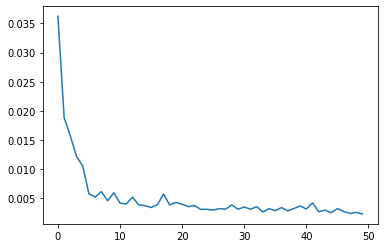

In [21]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
loss_per_epoch = model.history.history['loss']

plt.plot(len(loss_per_epoch),loss_per_epoch)

KeyError: ignored

In [22]:
last_train_batch = scaled_train[-12:]
print(last_train_batch)

[[0.66105769]
 [0.54086538]
 [0.80769231]
 [0.83894231]
 [1.        ]
 [0.94711538]
 [0.85336538]
 [0.75480769]
 [0.62980769]
 [0.62259615]
 [0.52884615]
 [0.625     ]]


In [ ]:
model.predict(last_train_batch)[0]

array([0.07270096], dtype=float32)

In [23]:
last_train_batch = last_train_batch.reshape(1, n_input, n_features)
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [ ]:
model.predict(last_train_batch)

array([[0.58541155]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [ ]:
  current_batch

array([[[0.58541155],
        [0.59905016],
        [0.71580517],
        [0.78432631],
        [0.84615576],
        [0.84165686],
        [0.79441118],
        [0.71463418],
        [0.63401604],
        [0.58353329],
        [0.54608983],
        [0.56394935]]])

In [ ]:
test_predictions

[array([0.58541155], dtype=float32),
 array([0.59905016], dtype=float32),
 array([0.7158052], dtype=float32),
 array([0.7843263], dtype=float32),
 array([0.84615576], dtype=float32),
 array([0.84165686], dtype=float32),
 array([0.7944112], dtype=float32),
 array([0.7146342], dtype=float32),
 array([0.63401604], dtype=float32),
 array([0.5835333], dtype=float32),
 array([0.5460898], dtype=float32),
 array([0.56394935], dtype=float32)]

In [ ]:
test.head(5)

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions
test['Predictions'].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date
1975-01-01    796.531204
1975-02-01    802.204868
1975-03-01    850.774952
1975-04-01    879.279747
1975-05-01    905.000797
Name: Predictions, dtype: float64

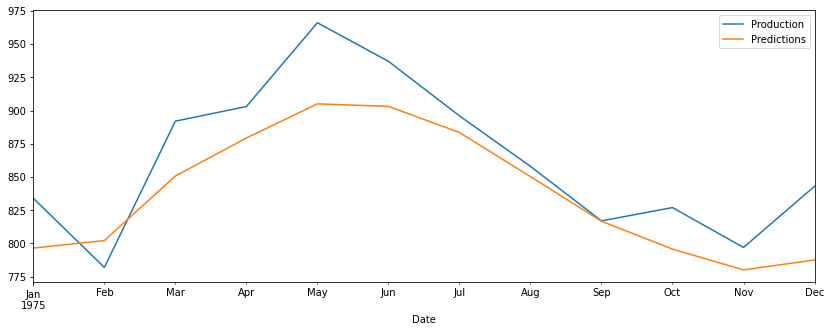

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
test.head(5)

,Production,Predictions
Date,,
1975-01-01,834,796.531204
1975-02-01,782,802.204868
1975-03-01,892,850.774952
1975-04-01,903,879.279747
1975-05-01,966,905.000797
